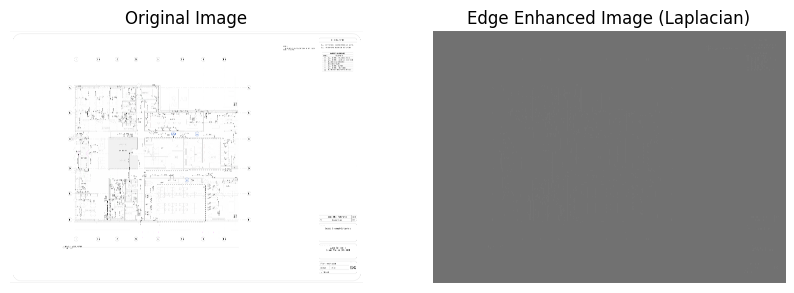

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('data\input_file\LEVEL_1_POWER_PLAN_page_0002.jpg')
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Laplacian filter to detect edges
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# Convert back to uint8
laplacian = cv2.convertScaleAbs(laplacian)

# Display the original and edge-enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Edge Enhanced Image (Laplacian)')
plt.axis('off')

plt.show()

In [8]:
import cv2
import numpy as np
import os

# Load the image
image = cv2.imread('data/input_file/LEVEL1_POWER_PLAN_page_0001.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

# Create a mask from the edges
mask = np.zeros_like(gray_image)  # Create a black mask
mask[edges > 0] = 255  # Set edges to white

# Blur the original image
blurred_image = cv2.GaussianBlur(image, (21, 21), 0)

# Create an inverse mask
inverse_mask = cv2.bitwise_not(mask)

# Combine the images
# Keep the original image where the mask is white (edges)
sharp_edges = cv2.bitwise_and(image, image, mask=mask)
# Keep the blurred image where the mask is black (background)
blurred_background = cv2.bitwise_and(blurred_image, blurred_image, mask=inverse_mask)

# Combine the two images
final_image = cv2.add(sharp_edges, blurred_background)

# Save the final image
output_folder = 'C:/Users/pis05408.PINNACLE/Desktop/Suraj/ObjectDetectionFlorPlan/Presentation/test'
os.makedirs(output_folder, exist_ok=True)
print(f'output_folder: {output_folder}')

filename = f"blurred_background.jpg"
filepath = os.path.join(output_folder, filename)

cv2.imwrite(filepath, final_image)

# Optionally display the result
cv2.imshow('Final Image', final_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

output_folder: C:/Users/pis05408.PINNACLE/Desktop/Suraj/ObjectDetectionFlorPlan/Presentation/test
